In [5]:
# Neural Network class definitions
import numpy
import scipy.special

class neuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        
        # set the number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # Weights - Heart of the Neural Network
        # link Weight matrices, 
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc
        # Get weight sample from a normal probability distribution centered around zero with standard deviation that is
        # related to the number of incoming links into a node. 1/root(number of incoming links)
        
        # wih = Weight to apply for values moving from input to output layers
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        # who = Weight to apply for values moving from hidden layer to output layer
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    
    # train the network
    def train(self, inputs_list, targets_list):
        # 1. Work out for a given training example
        # 2. Take calculated example from (1); compare it to desired output, and use the difference 
        # to guide the updating of network weights
        
        # convert input list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # Calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        
        # Calculate signals coming out of hidden layer (sigmoid application)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # Calculate signals into the output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        
        # Calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # error is the (target - actual)
        output_errors = targets - final_outputs
        
        # Calculate the back-propagation errors for the hidden layer nodes.
        # we split the errors according to the connected weights, and recombine them for each 
        # hidden layer node.
        # mathematically this (errors of hidden = weights of hidden output * errors from output layer)
        # This effectively gives us what we need to refine the weights at each layer. 
        
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # print(numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs)))
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), 
                                        numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the hidden and output layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), 
                                        numpy.transpose(inputs))
        
        pass
    
    # query the neural network
    def query(self, input_list):
        # convert input list into a sd array
        inputs = numpy.array(input_list, ndmin=2).T
        # print(inputs)
        # print(input_list)
        # print(self.wih)
        
        # takes the input to a neural network and returns the network's output
        # pass input signal from the input layer of nodes, through hidden and the output layer. Using the link Weight to 
        # to moderate the signals as they feed into any given node (output or hidden)
        
        # calculate signals into the hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        
        # calculate signal emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        
        # calculate the signals emerging from the final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [6]:
# number of input, hidden and output nodes
# The ultimate goal is to find features or patterns.
# the hand-written image is 28 * 28 = 784px. So our input nodes should be 784
input_nodes = 784

# No science here. But we cannot be more than the input_nodes.
# Choosing a number smaller than input forces the network to summarise the key features.
hidden_nodes = 200

# the output is in effect what we are asking the network - classify images and assign
# labels. The labels are 10 numbers. Therefore we should have output layer of 10
output_nodes = 10

# learning rate
learning_rate = 0.3

# create instance of the neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [7]:
training_data_file = open("NeuralNetwork/TrainAndTestData/mnist_train.csv")
training_data_list = training_data_file.readlines()
training_data_file.close()
# train and test files have extra line in them, hack the line out for now.
if training_data_list[-1] == '\n':
    training_data_list = training_data_list[:training_data_list.__len__() - 1]

In [8]:
# train the neural network
# go through all records in the training data set

# epochs is the number of times the training data set is used for training
epochs = 2
for e in range(epochs):
    for record in training_data_list:
        # split the record into array on ','
        all_values = record.split(',')

        # scale scale and shift the input - so as to keep them in the comfort zone 
        # of the node activation function
        # As each value is an color array value of 0-255 array, we will try and bring
        # them down into the range 0.01 to  1.00.
        # Divide by 255 to bring to 0-1 range
        # Multiply by 0.99 to bring to 0.0-0.9 range
        # Add 0.01 to shift to the desired range of 0.01 -  1.00
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        
        # all_values[0] is the target label for this record -> the first row contain the target label value 
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [9]:
# Lets test the network
# lat the mnist test data csv
test_date_file = open('NeuralNetwork/TrainAndTestData/mnist_test.csv', 'r')
test_data_list = test_date_file.readlines()
test_date_file.close()

['8', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '38', '48', '48', '22', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', 

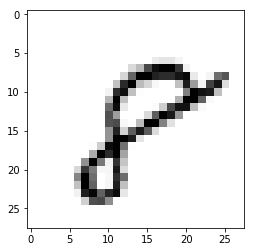

In [10]:
import matplotlib.pyplot
 %matplotlib inline
 image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))
 print(all_values)
 matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [11]:
# Score card for how well the network performs - start off empty
scorecard = []
if test_data_list[-1] == '\n':
    test_data_list = test_data_list[:test_data_list.__len__() - 1]
    
for record in test_data_list:
    
    all_values = record.split(',')

    # the first value is the correct label
    correct_label = int(all_values[0])
    print(correct_label, "Correct Label")

    # scale and shift input
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

    # query the network
    outputs = n.query(inputs)

    # the index of the highest label corresponds to the label
    label = numpy.argmax(outputs)
    # print(label, "Network's answer")

    # append correct or wrong on to the list
    if label == correct_label:
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
pass

7 Correct Label
2 Correct Label
1 Correct Label
0 Correct Label
4 Correct Label
1 Correct Label
4 Correct Label
9 Correct Label
5 Correct Label
9 Correct Label
0 Correct Label
6 Correct Label
9 Correct Label
0 Correct Label
1 Correct Label
5 Correct Label
9 Correct Label
7 Correct Label
3 Correct Label
4 Correct Label
9 Correct Label
6 Correct Label
6 Correct Label
5 Correct Label
4 Correct Label
0 Correct Label
7 Correct Label
4 Correct Label
0 Correct Label
1 Correct Label
3 Correct Label
1 Correct Label
3 Correct Label
4 Correct Label
7 Correct Label
2 Correct Label
7 Correct Label
1 Correct Label
2 Correct Label
1 Correct Label
1 Correct Label
7 Correct Label
4 Correct Label
2 Correct Label
3 Correct Label
5 Correct Label
1 Correct Label
2 Correct Label
4 Correct Label
4 Correct Label
6 Correct Label
3 Correct Label
5 Correct Label
5 Correct Label
6 Correct Label
0 Correct Label
4 Correct Label
1 Correct Label
9 Correct Label
5 Correct Label
7 Correct Label
8 Correct Label
9 Correc

3 Correct Label
8 Correct Label
3 Correct Label
1 Correct Label
4 Correct Label
5 Correct Label
6 Correct Label
8 Correct Label
9 Correct Label
4 Correct Label
1 Correct Label
5 Correct Label
3 Correct Label
8 Correct Label
0 Correct Label
3 Correct Label
2 Correct Label
5 Correct Label
1 Correct Label
2 Correct Label
8 Correct Label
3 Correct Label
4 Correct Label
4 Correct Label
0 Correct Label
8 Correct Label
8 Correct Label
3 Correct Label
3 Correct Label
1 Correct Label
7 Correct Label
3 Correct Label
5 Correct Label
9 Correct Label
6 Correct Label
3 Correct Label
2 Correct Label
6 Correct Label
1 Correct Label
3 Correct Label
6 Correct Label
0 Correct Label
7 Correct Label
2 Correct Label
1 Correct Label
7 Correct Label
1 Correct Label
4 Correct Label
2 Correct Label
4 Correct Label
2 Correct Label
1 Correct Label
7 Correct Label
9 Correct Label
6 Correct Label
1 Correct Label
1 Correct Label
2 Correct Label
4 Correct Label
8 Correct Label
1 Correct Label
7 Correct Label
7 Correc

5 Correct Label
4 Correct Label
2 Correct Label
3 Correct Label
8 Correct Label
4 Correct Label
5 Correct Label
5 Correct Label
0 Correct Label
3 Correct Label
8 Correct Label
5 Correct Label
3 Correct Label
5 Correct Label
8 Correct Label
6 Correct Label
5 Correct Label
7 Correct Label
6 Correct Label
3 Correct Label
3 Correct Label
9 Correct Label
6 Correct Label
1 Correct Label
1 Correct Label
2 Correct Label
9 Correct Label
0 Correct Label
4 Correct Label
3 Correct Label
3 Correct Label
6 Correct Label
9 Correct Label
5 Correct Label
7 Correct Label
3 Correct Label
7 Correct Label
7 Correct Label
7 Correct Label
8 Correct Label
7 Correct Label
9 Correct Label
8 Correct Label
3 Correct Label
0 Correct Label
7 Correct Label
2 Correct Label
7 Correct Label
9 Correct Label
4 Correct Label
5 Correct Label
4 Correct Label
9 Correct Label
3 Correct Label
2 Correct Label
1 Correct Label
4 Correct Label
0 Correct Label
2 Correct Label
3 Correct Label
7 Correct Label
5 Correct Label
7 Correc

4 Correct Label
4 Correct Label
5 Correct Label
8 Correct Label
0 Correct Label
6 Correct Label
8 Correct Label
9 Correct Label
8 Correct Label
5 Correct Label
6 Correct Label
9 Correct Label
0 Correct Label
4 Correct Label
8 Correct Label
7 Correct Label
1 Correct Label
3 Correct Label
4 Correct Label
5 Correct Label
8 Correct Label
0 Correct Label
9 Correct Label
1 Correct Label
3 Correct Label
3 Correct Label
6 Correct Label
9 Correct Label
8 Correct Label
7 Correct Label
1 Correct Label
0 Correct Label
5 Correct Label
7 Correct Label
1 Correct Label
7 Correct Label
5 Correct Label
2 Correct Label
7 Correct Label
9 Correct Label
1 Correct Label
8 Correct Label
5 Correct Label
2 Correct Label
4 Correct Label
9 Correct Label
4 Correct Label
7 Correct Label
2 Correct Label
2 Correct Label
3 Correct Label
4 Correct Label
9 Correct Label
1 Correct Label
9 Correct Label
2 Correct Label
1 Correct Label
7 Correct Label
9 Correct Label
4 Correct Label
4 Correct Label
1 Correct Label
6 Correc

1 Correct Label
6 Correct Label
5 Correct Label
8 Correct Label
1 Correct Label
5 Correct Label
3 Correct Label
3 Correct Label
0 Correct Label
3 Correct Label
5 Correct Label
5 Correct Label
9 Correct Label
2 Correct Label
8 Correct Label
7 Correct Label
0 Correct Label
4 Correct Label
9 Correct Label
1 Correct Label
9 Correct Label
7 Correct Label
7 Correct Label
5 Correct Label
5 Correct Label
2 Correct Label
0 Correct Label
9 Correct Label
1 Correct Label
8 Correct Label
6 Correct Label
2 Correct Label
3 Correct Label
9 Correct Label
6 Correct Label
2 Correct Label
1 Correct Label
9 Correct Label
1 Correct Label
3 Correct Label
5 Correct Label
5 Correct Label
0 Correct Label
3 Correct Label
8 Correct Label
3 Correct Label
3 Correct Label
7 Correct Label
6 Correct Label
6 Correct Label
0 Correct Label
1 Correct Label
4 Correct Label
0 Correct Label
6 Correct Label
9 Correct Label
8 Correct Label
1 Correct Label
2 Correct Label
9 Correct Label
9 Correct Label
5 Correct Label
9 Correc

1 Correct Label
0 Correct Label
9 Correct Label
4 Correct Label
4 Correct Label
8 Correct Label
3 Correct Label
2 Correct Label
5 Correct Label
9 Correct Label
7 Correct Label
6 Correct Label
6 Correct Label
2 Correct Label
0 Correct Label
0 Correct Label
0 Correct Label
5 Correct Label
8 Correct Label
7 Correct Label
1 Correct Label
5 Correct Label
2 Correct Label
3 Correct Label
8 Correct Label
5 Correct Label
1 Correct Label
8 Correct Label
2 Correct Label
0 Correct Label
4 Correct Label
9 Correct Label
9 Correct Label
6 Correct Label
2 Correct Label
3 Correct Label
3 Correct Label
5 Correct Label
6 Correct Label
4 Correct Label
8 Correct Label
0 Correct Label
9 Correct Label
2 Correct Label
8 Correct Label
3 Correct Label
6 Correct Label
7 Correct Label
5 Correct Label
7 Correct Label
2 Correct Label
9 Correct Label
4 Correct Label
9 Correct Label
1 Correct Label
2 Correct Label
8 Correct Label
6 Correct Label
0 Correct Label
7 Correct Label
0 Correct Label
9 Correct Label
1 Correc


6 Correct Label
9 Correct Label
3 Correct Label
9 Correct Label
2 Correct Label
2 Correct Label
9 Correct Label
2 Correct Label
1 Correct Label
8 Correct Label
3 Correct Label
2 Correct Label
9 Correct Label
6 Correct Label
8 Correct Label
4 Correct Label
0 Correct Label
1 Correct Label
2 Correct Label
8 Correct Label
4 Correct Label
5 Correct Label
2 Correct Label
7 Correct Label
8 Correct Label
1 Correct Label
1 Correct Label
3 Correct Label
0 Correct Label
3 Correct Label
5 Correct Label
7 Correct Label
0 Correct Label
3 Correct Label
1 Correct Label
9 Correct Label
3 Correct Label
6 Correct Label
3 Correct Label
1 Correct Label
7 Correct Label
7 Correct Label
3 Correct Label
0 Correct Label
8 Correct Label
4 Correct Label
8 Correct Label
2 Correct Label
6 Correct Label
5 Correct Label
2 Correct Label
9 Correct Label
7 Correct Label
3 Correct Label
9 Correct Label
0 Correct Label
9 Correct Label
9 Correct Label
6 Correct Label
4 Correct Label
2 Correct Label
9 Correct Label
7 Corre

 Correct Label
6 Correct Label
6 Correct Label
0 Correct Label
8 Correct Label
0 Correct Label
2 Correct Label
3 Correct Label
7 Correct Label
9 Correct Label
4 Correct Label
7 Correct Label
1 Correct Label
9 Correct Label
1 Correct Label
7 Correct Label
1 Correct Label
4 Correct Label
0 Correct Label
0 Correct Label
4 Correct Label
1 Correct Label
7 Correct Label
5 Correct Label
7 Correct Label
1 Correct Label
3 Correct Label
3 Correct Label
3 Correct Label
1 Correct Label
6 Correct Label
9 Correct Label
7 Correct Label
4 Correct Label
3 Correct Label
0 Correct Label
2 Correct Label
5 Correct Label
2 Correct Label
6 Correct Label
0 Correct Label
8 Correct Label
9 Correct Label
4 Correct Label
3 Correct Label
5 Correct Label
4 Correct Label
8 Correct Label
1 Correct Label
5 Correct Label
9 Correct Label
0 Correct Label
6 Correct Label
4 Correct Label
3 Correct Label
6 Correct Label
3 Correct Label
3 Correct Label
8 Correct Label
1 Correct Label
4 Correct Label
7 Correct Label
5 Correct


2 Correct Label
3 Correct Label
4 Correct Label
5 Correct Label
6 Correct Label
7 Correct Label
8 Correct Label
9 Correct Label
0 Correct Label
1 Correct Label
2 Correct Label
3 Correct Label
4 Correct Label
5 Correct Label
6 Correct Label
7 Correct Label
8 Correct Label
9 Correct Label
1 Correct Label
2 Correct Label
6 Correct Label
5 Correct Label
3 Correct Label
0 Correct Label
7 Correct Label
0 Correct Label
4 Correct Label
1 Correct Label
4 Correct Label
3 Correct Label
6 Correct Label
7 Correct Label
2 Correct Label
3 Correct Label
1 Correct Label
2 Correct Label
1 Correct Label
2 Correct Label
9 Correct Label
6 Correct Label
0 Correct Label
1 Correct Label
3 Correct Label
0 Correct Label
2 Correct Label
7 Correct Label
5 Correct Label
7 Correct Label
6 Correct Label
2 Correct Label
9 Correct Label
1 Correct Label
9 Correct Label
0 Correct Label
6 Correct Label
0 Correct Label
6 Correct Label
0 Correct Label
2 Correct Label
0 Correct Label
6 Correct Label
1 Correct Label
5 Corre

 Correct Label
6 Correct Label
3 Correct Label
1 Correct Label
5 Correct Label
2 Correct Label
5 Correct Label
9 Correct Label
9 Correct Label
8 Correct Label
4 Correct Label
1 Correct Label
0 Correct Label
6 Correct Label
0 Correct Label
9 Correct Label
6 Correct Label
8 Correct Label
8 Correct Label
5 Correct Label
6 Correct Label
1 Correct Label
1 Correct Label
9 Correct Label
8 Correct Label
9 Correct Label
2 Correct Label
3 Correct Label
5 Correct Label
5 Correct Label
9 Correct Label
4 Correct Label
2 Correct Label
1 Correct Label
9 Correct Label
4 Correct Label
9 Correct Label
1 Correct Label
3 Correct Label
9 Correct Label
2 Correct Label
0 Correct Label
6 Correct Label
0 Correct Label
4 Correct Label
0 Correct Label
6 Correct Label
0 Correct Label
1 Correct Label
2 Correct Label
3 Correct Label
4 Correct Label
5 Correct Label
6 Correct Label
7 Correct Label
8 Correct Label
9 Correct Label
0 Correct Label
1 Correct Label
2 Correct Label
3 Correct Label
4 Correct Label
5 Correct

5 Correct Label
8 Correct Label
1 Correct Label
4 Correct Label
8 Correct Label
4 Correct Label
1 Correct Label
8 Correct Label
6 Correct Label
6 Correct Label
4 Correct Label
6 Correct Label
0 Correct Label
5 Correct Label
5 Correct Label
3 Correct Label
3 Correct Label
5 Correct Label
7 Correct Label
2 Correct Label
5 Correct Label
9 Correct Label
6 Correct Label
9 Correct Label
2 Correct Label
6 Correct Label
2 Correct Label
1 Correct Label
2 Correct Label
0 Correct Label
8 Correct Label
3 Correct Label
8 Correct Label
3 Correct Label
0 Correct Label
8 Correct Label
7 Correct Label
4 Correct Label
9 Correct Label
5 Correct Label
0 Correct Label
9 Correct Label
7 Correct Label
0 Correct Label
0 Correct Label
4 Correct Label
6 Correct Label
0 Correct Label
9 Correct Label
1 Correct Label
6 Correct Label
2 Correct Label
7 Correct Label
6 Correct Label
8 Correct Label
3 Correct Label
5 Correct Label
2 Correct Label
1 Correct Label
8 Correct Label
3 Correct Label
8 Correct Label
6 Correc

 Correct Label
7 Correct Label
1 Correct Label
3 Correct Label
1 Correct Label
7 Correct Label
9 Correct Label
6 Correct Label
2 Correct Label
0 Correct Label
9 Correct Label
1 Correct Label
7 Correct Label
3 Correct Label
3 Correct Label
9 Correct Label
1 Correct Label
6 Correct Label
4 Correct Label
3 Correct Label
9 Correct Label
8 Correct Label
2 Correct Label
1 Correct Label
8 Correct Label
6 Correct Label
4 Correct Label
1 Correct Label
5 Correct Label
5 Correct Label
6 Correct Label
5 Correct Label
0 Correct Label
1 Correct Label
2 Correct Label
3 Correct Label
4 Correct Label
5 Correct Label
6 Correct Label
7 Correct Label
8 Correct Label
9 Correct Label
0 Correct Label
1 Correct Label
2 Correct Label
3 Correct Label
4 Correct Label
5 Correct Label
6 Correct Label
7 Correct Label
8 Correct Label
9 Correct Label
0 Correct Label
1 Correct Label
2 Correct Label
3 Correct Label
4 Correct Label
5 Correct Label
6 Correct Label
7 Correct Label
8 Correct Label
9 Correct Label
6 Correct

Correct Label
9 Correct Label
2 Correct Label
9 Correct Label
3 Correct Label
9 Correct Label
3 Correct Label
0 Correct Label
0 Correct Label
1 Correct Label
0 Correct Label
4 Correct Label
2 Correct Label
6 Correct Label
3 Correct Label
5 Correct Label
3 Correct Label
0 Correct Label
3 Correct Label
4 Correct Label
1 Correct Label
5 Correct Label
3 Correct Label
0 Correct Label
8 Correct Label
3 Correct Label
0 Correct Label
6 Correct Label
1 Correct Label
7 Correct Label
8 Correct Label
0 Correct Label
9 Correct Label
2 Correct Label
6 Correct Label
7 Correct Label
1 Correct Label
9 Correct Label
6 Correct Label
9 Correct Label
4 Correct Label
9 Correct Label
9 Correct Label
6 Correct Label
7 Correct Label
1 Correct Label
2 Correct Label
5 Correct Label
3 Correct Label
7 Correct Label
8 Correct Label
0 Correct Label
1 Correct Label
2 Correct Label
4 Correct Label
5 Correct Label
6 Correct Label
7 Correct Label
8 Correct Label
9 Correct Label
0 Correct Label
1 Correct Label
3 Correct 

In [16]:
# Wow! 60% success with training record of just 100-record training set
scorecard_array = numpy.asfarray(scorecard)
print("Perf = ", scorecard_array.sum() / scorecard_array.size * 100, "%")

Perf =  96.05 %
